In [1]:
# Installation of packages and embedding
import sys
!{sys.executable} -m spacy download en_core_web_sm
!pip install pandas-profiling[notebook]

2021-10-06 09:48:05.971906: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-06 09:48:05.971993: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
     |████████████████████████████████| 13.6 MB 24.6 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     |████████████████████████████████| 261 kB 19.2 MB/s 
     |████████████████████████████████| 102 kB 19.2 MB/s 
     |████████████████████████████████| 675 kB 37.7 MB/s 
     |████████████████████████████████| 3.1 MB 30.8 MB/s 
     |████████████████████████████████| 121 kB 45.1 MB/s 
     |████████████████████████████████| 1.9 MB 45.0 MB/s 
     |████████████████████████████████| 812 kB 34.6 MB/s 
     |████████████████████████████████| 2.2 MB

In [9]:
# Import dataset and pandas
import pandas as pd
raw_trainDF = pd.read_csv("/work/covid_sentiment/data/coronavirus_tweet_raw/Corona_NLP_train.csv")
raw_testDF = pd.read_csv("/work/covid_sentiment/data/coronavirus_tweet_raw/Corona_NLP_test.csv")
#raw_trainDF.head()
len(raw_testDF)

3798

In [12]:
# Generate a pandas profiling report
from pandas_profiling import ProfileReport
profile = ProfileReport(raw_trainDF, title="Pandas Profiling Report (Train)")
profile.to_file(output_file="/work/covid_sentiment/reports/NLP_COVID_EDA_train_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
profile = ProfileReport(raw_testDF, title="Pandas Profiling Report (Test)")
profile.to_file(output_file="/work/covid_sentiment/reports/NLP_COVID_EDA_test_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# Print a sample text
sample_text = raw_trainDF.OriginalTweet[0]
print(sample_text)

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8


In [5]:
# Use spaCy for NP, V, and NER
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(sample_text)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

2021-10-06 09:49:03.099463: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-06 09:49:03.099521: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Noun phrases: ['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa', 'https://t.co/xX6ghGFzCC']
Verbs: ['https://t.co/I2NlzdxNo8']


In [6]:
# Apply nlp() to all values in "OriginalTweet"
trainDF = raw_trainDF
#trainDF.nlp = trainDF.OriginalTweet.apply(lambda x: nlp(x))

testDF = raw_testDF 
#testDF.nlp = testDF.OriginalTweet.apply(lambda x: nlp(x))


In [7]:
# Testing out spaCy with pandas
trainDF.np = trainDF.nlp.apply(lambda x: [chunk.text for chunk in x.noun_chunks])
trainDF.vb = trainDF.nlp.apply(lambda x: [token.lemma_ for token in x if token.pos_ == "VERB"])

AttributeError: 'DataFrame' object has no attribute 'nlp'

In [ ]:
# Label Encoder for classes in sentiment 
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
trainDF.encoded_sentiment = encoder.fit_transform(trainDF.Sentiment)
trainDF.encoded_sentiment

encoder = LabelEncoder()
testDF.encoded_sentiment = encoder.fit_transform(testDF.Sentiment)
testDF.encoded_sentiment

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


array([0, 4, 1, ..., 3, 0, 1])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [ ]:
# Fuzzy matching packages
from polyfuzz import PolyFuzz
from polyfuzz.models import RapidFuzz

def fuzzmatch(text):
    matcher = RapidFuzz(n_jobs=1, score_cutoff=0.9)
    model = PolyFuzz(matcher)

In [ ]:
import string
import re
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")
# Create our list of punctuation marks
punctuations = string.punctuation
# Create our list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "PROPN" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # Removing links
    sta
    re.findall()
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

spacy_tokenizer(sample_text)

# Fuzzy matching for misspelling

['trending',
 'new',
 'yorkers',
 'encounter',
 'supermarket',
 'shelf',
 'picture',
 'wegmans',
 'brooklyn',
 'sell',
 'online',
 'grocer',
 'foodkick',
 'maxdelivery',
 'coronavirus',
 'fear',
 'shopper',
 'stock',
 'https://t.co/gr76pcrlwh',
 'https://t.co/ivmkmsqdt1']

In [ ]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [ ]:
# Bag-of-words data transformation
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
#tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)


In [ ]:
import matplotlib.pyplot as plt
trainDF['length'] = trainDF.OriginalTweet.apply(lambda x: len(spacy_tokenizer(x)))
testDF['length'] = testDF.OriginalTweet.apply(lambda x: len(spacy_tokenizer(x)))

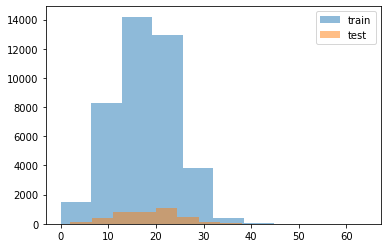

In [ ]:
plt.hist(trainDF['length'], bins = 15, alpha = 0.5, label= "train")
plt.hist(testDF['length'], bins= 15, alpha = 0.5, label = "test")
plt.legend()
plt.show()

In [ ]:
trainDF = trainDF[trainDF.length > 0.2*trainDF.length.mean()]
testDF = testDF[testDF.length > 0.2*testDF.length.mean()]

In [ ]:
# Train test split
from sciket

X_train = trainDF.OriginalTweet
X_test = testDF.OriginalTweet
y_train = trainDF.encoded_sentiment
y_test = testDF.encoded_sentiment

In [ ]:
# Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

NameError: name 'Pipeline' is not defined

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print(classification_report(y_test, predicted, target_names = ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']))



                    precision    recall  f1-score   support

Extremely Negative       0.63      0.19      0.29       592
          Negative       0.73      0.20      0.31       599
           Neutral       0.41      0.54      0.47      1040
          Positive       0.70      0.15      0.25       614
Extremely Positive       0.35      0.72      0.47       945

          accuracy                           0.41      3790
         macro avg       0.56      0.36      0.36      3790
      weighted avg       0.53      0.41      0.38      3790



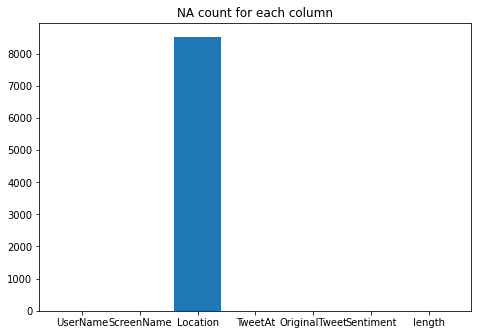

In [ ]:
# Interesting Plots
import matplotlib.pyplot as plt
NA = []

for col in trainDF.columns:
    
    NA.append(sum(trainDF[col].isna()))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(trainDF.columns,NA)
plt.title("NA count for each column")
plt.show()


Text(0.5, 1.0, 'Number of Tweet by time')

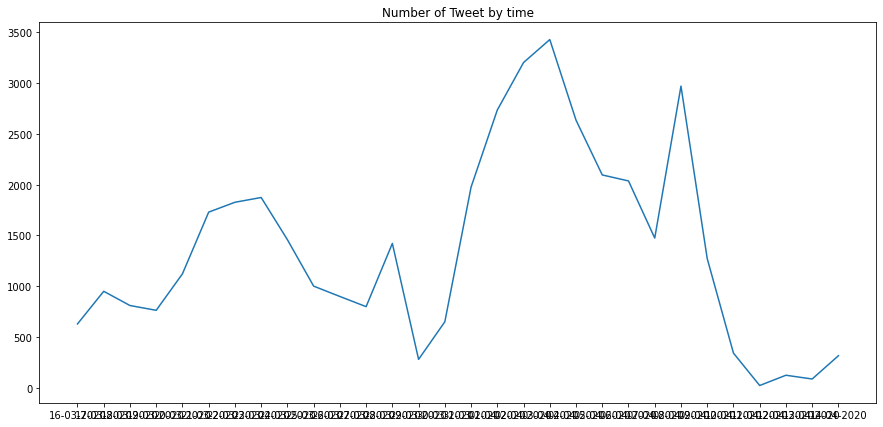

In [ ]:
sentiments = trainDF.groupby(by = ['TweetAt']).count()['Sentiment']
time = trainDF.TweetAt.unique()

fig = plt.figure(figsize=(15,7))
plt.plot(time,sentiments)
plt.title("Number of Tweet by time")

In [ ]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression()

# Create pipeline using Bag of Words
pipe_log = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier_log)])

# model generation
pipe_log.fit(X_train,y_train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7f9e9258dd50>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7f9e93ab1440>)),
                ('classifier', LogisticRegression())])

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
# Predicting with a test dataset
predicted_log = pipe_log.predict(X_test)

# Model Accuracy
print(classification_report(y_test, predicted_log, target_names = ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']))



                    precision    recall  f1-score   support

Extremely Negative       0.64      0.57      0.60       592
          Negative       0.68      0.58      0.63       599
           Neutral       0.54      0.52      0.53      1040
          Positive       0.60      0.68      0.64       614
Extremely Positive       0.53      0.59      0.56       945

          accuracy                           0.58      3790
         macro avg       0.60      0.59      0.59      3790
      weighted avg       0.58      0.58      0.58      3790



In [ ]:
# SVM Classifier
from sklearn.svm import SVC
classifier_svm = SVC()

# Create pipeline using Bag of Words
pipe_svm = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier_svm)])

# model generation
pipe_svm.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7f9e8726d9d0>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7f9e93ab1440>)),
                ('classifier', SVC())])

In [ ]:
# Classificatin Report
from sklearn.metrics import classification_report
# Predicting with a test dataset
predicted_svm = pipe_svm.predict(X_test)

# Model Accuracy
print(classification_report(y_test, predicted_svm, target_names = ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']))

                    precision    recall  f1-score   support

Extremely Negative       0.68      0.44      0.53       592
          Negative       0.73      0.48      0.58       599
           Neutral       0.52      0.53      0.52      1040
          Positive       0.58      0.70      0.63       614
Extremely Positive       0.49      0.63      0.55       945

          accuracy                           0.56      3790
         macro avg       0.60      0.55      0.56      3790
      weighted avg       0.58      0.56      0.56      3790



     |████████████████████████████████| 15.7 MB 50.6 MB/s 
     |████████████████████████████████| 1.6 MB 68.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
ERROR: Could not install packages due to an OSError: [Errno 30] Read-only file system: '/shared-libs/python3.7/py/bin/f2py'

Note: you may need to restart the kernel to use updated packages.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=36980032-e74f-4047-828e-e2329ad1a610' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>